In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = ['SimHei']

In [2]:
data = pd.read_csv("mask_data_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99485 entries, 0 to 99484
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单编号    99485 non-null  object 
 1   日期      99485 non-null  object 
 2   省       99485 non-null  object 
 3   订单量     99485 non-null  float64
 4   单价      99485 non-null  float64
 5   销售额     99485 non-null  float64
 6   月份      99485 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 5.3+ MB


In [3]:
# 获取各月总订单量的数据
order_number = data.groupby('月份')['订单量'].sum()
# 绘制各月订单总量的折线图
order_number

月份
1      13852.0
2     389319.0
3    1961480.0
4     546276.0
5     158188.0
6      22222.0
Name: 订单量, dtype: float64

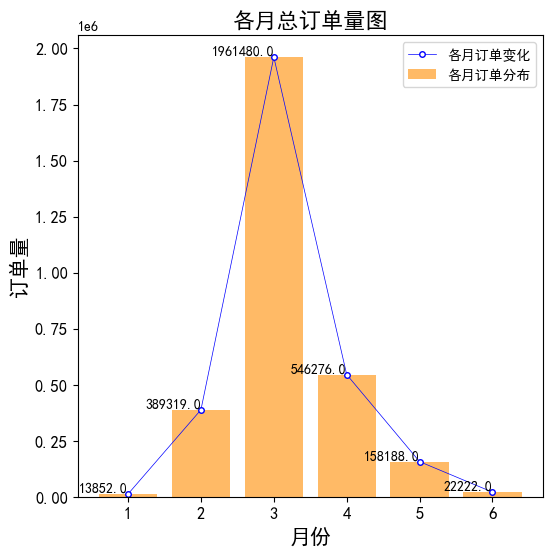

In [4]:
# 设置画布和x，y轴
plt.figure(figsize=(6, 6))
x = order_number.index
y = order_number.values
#柱状图绘制
plt.bar(x,y,color='darkorange', alpha=0.6)
#绘制折线图
plt.plot(x,y,color='blue',linewidth=0.5,marker='o',markerfacecolor='w',markersize=4)
#设置标题
plt.title("各月总订单量图", fontdict = {'family':'SimHei','weight':'bold','size':16})
# 设置坐标轴的刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#设置坐标轴标签
plt.xlabel('月份',fontsize=15)
plt.ylabel('订单量',fontsize=15)
# 设置图例
plt.legend(['各月订单变化','各月订单分布'])
#数据标签
for month,order in zip(x,y):
    plt.text(month,order,order,ha='right',va='bottom',fontsize=10)
#保存
plt.savefig('各月订单总量图.png')

In [5]:
# 聚合分离求各省份各月的订单量总值
pro_month_order = data.groupby(['月份','省'])['订单量'].sum()
pro_month_order = pro_month_order.unstack()
pro_month_order

省,其他,广东,江苏,河南,湖北,湖南
月份,,,,,,
1,452.0,2628.0,263.0,434.0,9055.0,1020.0
2,10668.0,77427.0,2530.0,10058.0,259511.0,29125.0
3,16871.0,125618.0,4004.0,18293.0,1731060.0,65634.0
4,2713.0,46708.0,106.0,2917.0,476558.0,17274.0
5,1250.0,22364.0,118.0,1239.0,126342.0,6875.0
6,113.0,4038.0,116.0,107.0,17182.0,666.0


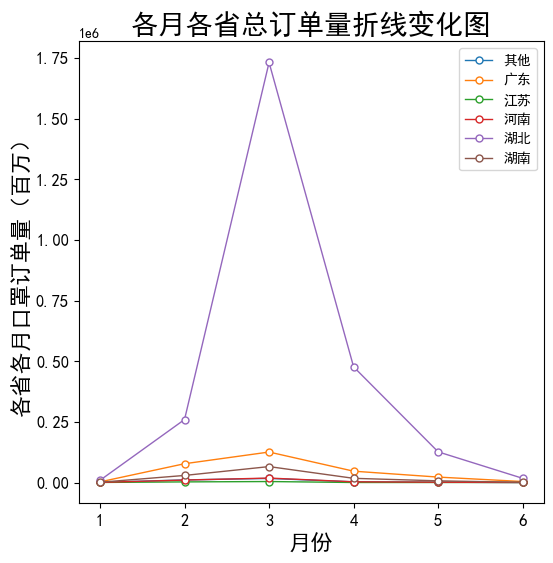

In [6]:
# 设置画布和x,y值
plt.figure(figsize=(6,6))
x = pro_month_order.index
y = pro_month_order.values
#绘制折线图
plt.plot(x,y,linewidth=1,marker='o',markerfacecolor='w',markersize=5)
#设置标题
plt.title("各月各省总订单量折线变化图", fontdict = {'family':'SimHei','weight':'bold','size':20})
#设置刻度值大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#设置坐标轴标题及字体大小
plt.xlabel('月份',fontsize=16)
plt.ylabel('各省各月口罩订单量（百万）',fontsize=16)
#设置图标
plt.legend(['其他', '广东', '江苏', '河南', '湖北', '湖南'])
#保存
plt.savefig('各月各省总订单量折现变化图.png')

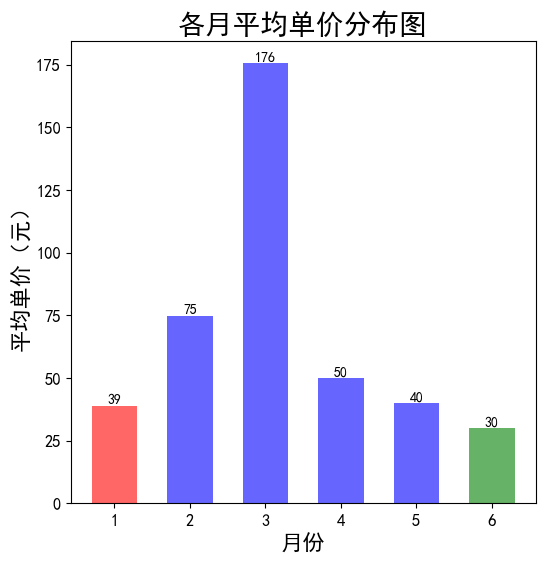

In [11]:
#聚合分离各月平均单价
month_mean = data.groupby('月份')['单价'].mean()
#设置x,y值和画布
plt.figure(figsize=(6,6))
x = month_mean.index
y = month_mean.values
#绘制柱状分布图
plt.bar(x,height=y,color=['r','b','b','b','b','g'],width=0.6,alpha=0.6)
#图标名称
plt.title("各月平均单价分布图",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('月份',fontsize=16)
plt.ylabel('平均单价（元）',fontsize=16)
for month,mean in zip(x,y):
    plt.text(month,mean,'%.0f' %mean,ha='center',va='bottom',fontsize=10)
plt.savefig('各月平均单价分布图.png')